# Импорт библиотек

In [1]:
# !pip install excel2img

In [46]:
from IPython.display import Image
import excel2img
import requests
import os
import re
import pandas as pd
import time

In [63]:
# Тип вывода результатов в jupiter
from IPython.core.interactiveshell import InteractiveShell

jup_conds = ['all',                # Показывать все вызовы
             'last',               # Показывать последнюю общность вызовов (если последним будет идти цикл с вызовами, выведет все его вызовы)
             'last_expr',          # Показывать самый последний вызов
             'none',               # Ничего не показывать
             'last_expr_or_assign' # Показывать последний вызов или присваивание
            ]

InteractiveShell.ast_node_interactivity = jup_conds[0]

In [4]:
base_dir = os.getcwd()
path_load = os.path.join(base_dir, 'Temporary', 'To_send')    # Путь к директории с исходными файлами
path_save = os.path.join(base_dir, 'Temporary', 'Generated')  # Путь к директории с сгенерированными файлами

# path_load = os.path.join(base_dir, 'Tests', 'Datasets')    # Путь к директории с исходными файлами
# path_save = os.path.join(base_dir, 'Temporary', 'Generated')  # Путь к директории с сгенерированными файлами

In [5]:
# excel2img.export_img(os.path.join(base_dir, 'Tests', 'Results', 'Респа для ПЕ-81б на [25.01.2022 - 13.04.2022].xlsx'), "test.png", "Январь", None)

![title](test.png)

# Генератор отформатированных файлов

In [44]:
# Проход по файлам в папке
for root, d, files in os.walk(path_load):
    for file_path in files:        
        with open(os.path.join(root, file_path), 'rb') as data:
            req = requests.post('http://127.0.0.1:5000/read-book', files={'file': data}).json()
            file_hash = req['file_hash']
            for sheet_name, groups in req['sheets'].items():
                for group_name in groups:
                    print(file_path, group_name)
                    time.sleep(0.01)
                    req = requests.post(f'http://127.0.0.1:5000/parse-book/{file_hash}/{sheet_name}/{group_name}/json')
                    print(req.status_code)

PE-01_02B_2_polug_2021-2022_s_31_01.xlsx ПЕ-01б
200
PE-01_02B_2_polug_2021-2022_s_31_01.xlsx ПЕ-02б
200
PE-81b_2semestr_24_01-16_04__vremennoe.xlsx ПЕ-81б
200


In [47]:
year = 2022
request = requests.post(f'http://127.0.0.1:5000/merge-books?year={year}')
print(f'Объединение книг за «{year}» год. Код ответа «{request.status_code}»')
df = pd.DataFrame(request.json())
df['date_pair'] = df['date_pair'].astype('datetime64')
df.head()

Объединение книг за «2022» год. Код ответа «200»


,group,day,num,item_name,teacher,type,pdgr,date_pair,cab
0,ПЕ-81б,ПН,1,Сетевое программное обеспечение,ст.преподаватель Лебедев Г.К.,ЛБ,2,2022-01-31,306 УК№1
1,ПЕ-81б,ПН,1,Сетевое программное обеспечение,ст.преподаватель Лебедев Г.К.,ЛБ,2,2022-02-07,306 УК№1
2,ПЕ-81б,ПН,1,Сетевое программное обеспечение,ст.преподаватель Лебедев Г.К.,ЛБ,2,2022-02-14,306 УК№1
3,ПЕ-81б,ПН,1,Сетевое программное обеспечение,ст.преподаватель Лебедев Г.К.,ЛБ,2,2022-02-21,306 УК№1
4,ПЕ-81б,ПН,1,Сетевое программное обеспечение,ст.преподаватель Лебедев Г.К.,ЛБ,2,2022-02-28,306 УК№1


In [48]:
df['group'].value_counts()

ПЕ-81б     483
183        478
185        430
182        416
181        412
184        409
ПЕ-02б     377
ПЕ-01б     367
123        361
МИВТ-11    208
МЕ-81б     175
ОЕ-81б     135
ИТ-81б     121
МИТЕ-01     93
Name: group, dtype: int64

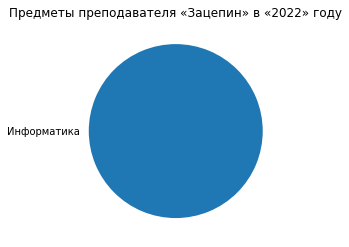

In [72]:
teacher_surname = 'Зацепин'
df_teachers = df[df['teacher'].str.contains(teacher_surname)]
df_teachers['item_name'].value_counts().plot(kind = 'pie', figsize = (10, 4),
                                             title = f'Предметы преподавателя «{teacher_surname}» в «{year}» году',
                                             ylabel = '');

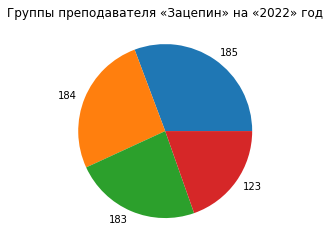

In [71]:
teacher_surname = 'Зацепин'
df_teachers = df[df['teacher'].str.contains(teacher_surname)]
df_teachers['group'].value_counts().plot(kind = 'pie', figsize = (10, 4),
                                         title = f'Группы преподавателя «{teacher_surname}» на «{year}» год',
                                         ylabel = '');

In [5]:
file.headers

{'Server': 'Werkzeug/2.1.1 Python/3.8.10', 'Date': 'Fri, 06 May 2022 16:16:13 GMT', 'Content-Type': 'text/html; charset=utf-8', 'Content-Length': '51702'}

In [10]:
def post_request(file_path):
    with open(file_path, 'rb') as data:
        request = requests.post('http://127.0.0.1:5000/read-book', files={'file': data})
        print(f'Загрузка книги. Код ответа «{request.status_code}»')
        # print(f'Данные: {request.content}')
        return request

# Тест на одном файле

In [11]:
r = post_request(os.path.join(base_dir, 'Tests', 'Datasets', 'PE-81b_2semestr_24_01-13_04.xlsx')).json()
r

Загрузка книги. Код ответа «200»


{'file_hash': '19e390e4fd80a2b80f448e87289087af308324307b6314e84e3085c1e27383b4',
 'sheets': {'ПЕ-81б (2)': ['ПЕ-81б']}}

In [98]:
file_hash = r['file_hash']
result_types = ['json']
# result_types = ['excel']
for sheet_name, groups in r['sheets'].items():
    for group_name in groups:
        for result_type in result_types:
            request = requests.post(f'http://127.0.0.1:5000/parse-book/{file_hash}/{sheet_name}/{group_name}/{result_type}')
            request.status_code
            re.findall(r"filename", request.headers['Content-Disposition'])[0]
            # with open(os.path.join(path_save, f'{group_name}.xlsx'), 'wb') as saved_file:
            #     saved_file.write(file)
            # request.content

200

'filename'

In [104]:
print(re.findall(r'filename="(.*)"', request.headers['Content-Disposition'])[0])

Respa dla PE-81b na [25.01.2022 - 13.04.2022].xlsx


In [97]:
request.headers

{'Server': 'Werkzeug/2.1.1 Python/3.9.1', 'Date': 'Mon, 25 Apr 2022 09:06:14 GMT', 'Content-Disposition': 'inline; filename="Respa dla PE-81b na [25.01.2022 - 13.04.2022].xlsx"', 'Content-Type': 'application/vnd.openxmlformats-officedocument.spreadsheetml.sheet', 'Content-Length': '14036', 'Last-Modified': 'Mon, 25 Apr 2022 09:06:14 GMT', 'Cache-Control': 'no-cache', 'ETag': '"1650877574.1997921-14036-1337399471"'}

In [105]:
with open(os.path.join(path_save, re.findall(r'filename="(.*)"', request.headers['Content-Disposition'])[0]), 'wb') as saved_file:
    saved_file.write(request.content)

14036

In [109]:
path_load

'D:\\CoolResp\\Temporary\\To_send'